In [4]:
pwd

'/home/david/Documents/maestria_ean_ciencias_datos/machine_learning_I/GUIA2'

In [5]:
import os
import pandas as pd

os.chdir("/home/david/Documents/maestria_ean_ciencias_datos/machine_learning_I/GUIA2")

In [6]:
cols = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv("car+evaluation/car.data",header=None)
df.columns = cols
df.head(), df.shape, df.describe()

(  buying  maint doors persons lug_boot safety  class
 0  vhigh  vhigh     2       2    small    low  unacc
 1  vhigh  vhigh     2       2    small    med  unacc
 2  vhigh  vhigh     2       2    small   high  unacc
 3  vhigh  vhigh     2       2      med    low  unacc
 4  vhigh  vhigh     2       2      med    med  unacc,
 (1728, 7),
        buying  maint doors persons lug_boot safety  class
 count    1728   1728  1728    1728     1728   1728   1728
 unique      4      4     4       3        3      3      4
 top     vhigh  vhigh     2       2    small    low  unacc
 freq      432    432   432     576      576    576   1210)

### exploramos a continuacion el tipo de datos de cada modelo

In [7]:
for col in cols:
    print(f"Columna {col}")
    print(df[col].unique())

Columna buying
['vhigh' 'high' 'med' 'low']
Columna maint
['vhigh' 'high' 'med' 'low']
Columna doors
['2' '3' '4' '5more']
Columna persons
['2' '4' 'more']
Columna lug_boot
['small' 'med' 'big']
Columna safety
['low' 'med' 'high']
Columna class
['unacc' 'acc' 'vgood' 'good']


### todos los atributos son categorias ya que cuentan con valores de texto limitados 

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

enc = OneHotEncoder()

buy = df[['buying']]

vboh = enc.fit_transform(buy)


In [9]:
vboh.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [10]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

#### Vamos a transformar las variables categoricas en ceros y unos (one hot encoding) de acuerdo a la cantidad de categorias que cada variable posea.  En particular se va a hacer el análisis usando la funcion ColumnTransformer de scikit wue permite transformar y agregar las variables en un arreglo bidimensional 

In [17]:
buyat = ["buying"]

fp = ColumnTransformer([
    ("buy",OneHotEncoder(),buyat)
    ,("maint",OneHotEncoder(),["maint"])
    ,("doors",OneHotEncoder(),["doors"])
    ,("persons",OneHotEncoder(),["persons"])
    ,("lug_boot",OneHotEncoder(),["lug_boot"])
    ,("safety",OneHotEncoder(),["safety"])
])

dprep = fp.fit_transform(df)
dprep.toarray()[0:2]

array([[0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 1.]])

### observese que el vector queda almacenado en matrices dispersas que se caracterizan por tener muchos más ceros que unos.  En estas matrices no se almacenan sino los valores mayores que cero en una eestructura que ahorra memoria

In [94]:
dprep

<1728x21 sparse matrix of type '<class 'numpy.float64'>'
	with 10368 stored elements in Compressed Sparse Row format>

#### la variable objetivo es la de la clase.  A continuación, ya deberían estar todas las variables listas para empezar a probar modelos.  Nos falta identificar métricas para ver que tan biebn se hacen las predicciones de los modelos

la variable objetivo tambien debe transformarse en diferentes categorias numéricas.  Aquí podemos usar otra función de scikit que simplemente nos cambie cada valor por un ordinal

In [95]:
from sklearn.preprocessing import OrdinalEncoder
orenc = OrdinalEncoder()

vo = orenc.fit_transform(df[['class']])
vo

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [3.]])

In [96]:
orenc.categories_

[array(['acc', 'good', 'unacc', 'vgood'], dtype=object)]

In [97]:
com_data = np.concatenate((dprep.toarray(),vo),axis=1)
com_data

array([[0., 0., 0., ..., 1., 0., 2.],
       [0., 0., 0., ..., 0., 1., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 1., 0., ..., 1., 0., 2.],
       [0., 1., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 0., 3.]])

### antes de comenzar hagamos un particionamiento de los datos entre entrenamiento y validaci[on usando las herramientas de scikit learn

In [98]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(com_data,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((1382, 22), (346, 22))

### Primero probamos un modelo lineal

In [99]:
xtrain.shape,ytrain.shape

((1382, 21), (1382,))

Coefficients: 
 [ 2.07180944e+12  2.07180944e+12  2.07180944e+12  2.07180944e+12
 -5.27633269e+13 -5.27633269e+13 -5.27633269e+13 -5.27633269e+13
  2.81811680e+13  2.81811680e+13  2.81811680e+13  2.81811680e+13
 -7.00268537e+12 -7.00268537e+12 -7.00268537e+12 -1.05865794e+13
 -1.05865794e+13 -1.05865794e+13 -5.35680417e+13 -5.35680417e+13
 -5.35680417e+13]
Mean squared error: 0.62
Coefficient of determination: 0.25


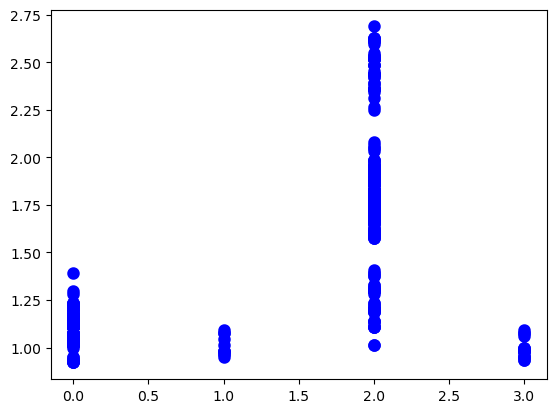

In [100]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### creamos el objeto para la regresion lineal
reg = linear_model.LinearRegression()

xtrain = train_set[:,:-1]
ytrain = train_set[:,-1]

### obtiene el ajuste lineal
### con los datpos de entrenamiento
reg.fit(xtrain, ytrain)

xtest = test_set[:,:-1]
ytest = test_set[:,-1]
y_predtest = reg.predict(xtest)

#plt.scatter(np.arange(len(ytest)),ytest,color='black')
plt.scatter(ytest,y_predtest,color='blue',linewidth=3)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_predtest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytest, y_predtest))

In [101]:
ytest.shape, y_predtest.shape

((346,), (346,))

In [102]:
#y_predtest

El modelo de  clasificación lineal no es el más apropiado para ajustar categorias por que en general esta diseñado para ajustar modelos con variables en el dominio de los reales $y \in \Re$.  Para variables categoricas existen otros algoritmos como la regresión logística y los árboles de decisión como se muestra por ejemplo en el paper del análisis de los datos.

### ya que todas las variables son categóricas, debemos usar algoritmos supervisados para clasificación que nos permitan usar variable categoricas de forma natural.

#### comenzaremos con un ejercicio de regresion logistica, ya que hemos convertido las clases de clasifciación en ordinales

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### creamos un objeto para la regresión logística
lreg = LogisticRegression()

### usamos la función para ajustar el modelo a los datos de ntrenamiento
lreg.fit(xtrain, ytrain)

## generamos las predicciones sobre 
## el set de pruebas
ypred = lreg.predict(xtest)

### vealuamos los resultados en términos de la precisión
print("Matriz de confusión:")
print(confusion_matrix(ytest, ypred))

print("\n")
print(f"Precision: {accuracy_score(ytest, ypred):.2f}")

print("\n")
print("Reporte de Clasificación:")
print(classification_report(ytest, ypred))

Matriz de confusión:
[[ 68   6   9   0]
 [  4   6   0   1]
 [  7   0 228   0]
 [  2   0   0  15]]


Precision: 0.92


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        83
         1.0       0.50      0.55      0.52        11
         2.0       0.96      0.97      0.97       235
         3.0       0.94      0.88      0.91        17

    accuracy                           0.92       346
   macro avg       0.81      0.80      0.81       346
weighted avg       0.92      0.92      0.92       346



### continuamos con un ejercicio donde clasificamos usando un árbol de decisión

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Crear el objeto para el árbol de decisión clasificador
clasi = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo a los datos
clasi.fit(xtrain, ytrain)


ypred = clasi.predict(xtest)

### evaluamos los resultados en términos de la precisión
print("Matriz de confusión:")
print(confusion_matrix(ytest, ypred))

print("\n")
print(f"Precision: {accuracy_score(ytest, ypred):.2f}")

print("\n")
print("Reporte de Clasificación:")
print(classification_report(ytest, ypred))

Matriz de confusión:
[[ 72   4   5   2]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   2   0  14]]


Precision: 0.96


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92        83
         1.0       0.62      0.91      0.74        11
         2.0       0.98      1.00      0.99       235
         3.0       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



### por último usamos un clasificador RandomForest

Matriz de confusión:
[[ 73   6   3   1]
 [  1   9   0   1]
 [  0   0 235   0]
 [  2   0   0  15]]


Precision: 0.96


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        83
         1.0       0.60      0.82      0.69        11
         2.0       0.99      1.00      0.99       235
         3.0       0.88      0.88      0.88        17

    accuracy                           0.96       346
   macro avg       0.86      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



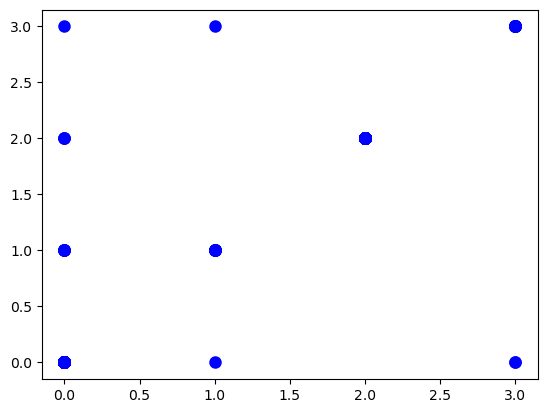

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### usemos el clasificador de árboles intentando sseguir la metodlogía descrita
### en el paper

### usemos la clase de bosques aleatorios
clf = RandomForestClassifier()

### ajustemos el modelo a los datos de entrenamiento
clf.fit(xtrain, ytrain)

### hagamos las predicciones 
### corresponddientes
ypred = clf.predict(xtest)

plt.scatter(ytest,ypred,color='blue',linewidth=3,)

### vealuamos los resultados en términos de la precisión
print("Matriz de confusión:")
print(confusion_matrix(ytest, ypred))

print("\n")
print(f"Precision: {accuracy_score(ytest, ypred):.2f}")

print("\n")
print("Reporte de Clasificación:")
print(classification_report(ytest, ypred))

### Resultados

De acuerdo a los resultados de la clasificación podemos observar que los modelos que mejor se desempeñaron son en su orden:
1. Árbol de decisión con un 96% de precisión
2. El clasificador RandoForest con 95% de precisión
3. El modelo de clasificación de regresión logística con 92%

###  A continuación vamos a intentar evaluar los modelos de usando la libreria de cross-validation 

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score
from sklearn.model_selection import cross_val_score


### creamos un objeto para la regresión logística
### 
lreg = LogisticRegression()
#Crear el objeto para el árbol de decisión clasificador
clasi = DecisionTreeClassifier(random_state=42)
### y para random forest
clf = RandomForestClassifier()

### creamos una funcion para calificar los resultados basados en la métrica F1
### si hay varias clases usa unos promedios ponderados
f1 = make_scorer(f1_score, average='weighted') 

cval = 10

## almacenamos los resultados en la variable res para el modelo de regresión logística
res = cross_val_score(lreg,com_data[:,:-1],com_data[:,-1],cv=cval,scoring=f1)
print("F1-Score para cada conjunto de datos ({cval}):", res)
print(f"valor Medio F1-Score Logistic Regression: {res.mean():.2f}")

## almacenamos los resultados en la variable res para el modelo de árboles de decisión
res = cross_val_score(clasi,com_data[:,:-1],com_data[:,-1],cv=cval,scoring=f1)
print("F1-Score para cada conjunto de datos ({cval}):", res)
print(f"valor Medio F1-Score Decision Tree: {res.mean():.2f}")

## almacenamos los resultados en la variable res para el modelo de árboles de decisión
res = cross_val_score(clf,com_data[:,:-1],com_data[:,-1],cv=cval,scoring=f1)
print("F1-Score para cada conjunto de datos ({cval}):", res)
print(f"valor Medio F1-Score Random Forest: {res.mean():.2f}")


F1-Score para cada conjunto de datos ({cval}): [0.78612169 0.76598202 0.78033583 0.83889883 0.82199563 0.80379821
 0.87854855 0.93501592 0.95205766 0.74434497]
valor Medio F1-Score Logistic Regression: 0.83
F1-Score para cada conjunto de datos ({cval}): [0.67664159 0.80201919 0.90504741 0.69472852 0.82187809 0.92446255
 0.88712313 0.85283406 0.91517485 0.84907259]
valor Medio F1-Score Decision Tree: 0.83
F1-Score para cada conjunto de datos ({cval}): [0.67416223 0.72054835 0.84786928 0.77890078 0.89705277 0.86788946
 0.91264195 0.90899413 0.95516397 0.86204013]
valor Medio F1-Score Random Forest: 0.84


#### Conclusión:

La técnica de **validación cruzada** permite ver que tan bien se estan comportando los modelos al ser evaluados en un número mayor de datasets.  Podemos observar que el modelo no es tan bueno como se pensaba originalmente siendo la regresión logística igual al árbol de decisión y un poco mejor el modelo de Random Forest

### Mejora de los modelos
A continuación vamos intentar mejorar los modelos.  Esto lo podemos hacer al alterar los paŕametros de cada función para encontrar un mejor ajuste.  Usaremos la técnica de grid search para este proposito de fine tuning

### Busqueda en malla (grid search)
Parámetros para la busqueda para el algoritmo de random forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que quieres ajustar
pgrid = {
    'n_estimators': [100, 200, 300],  # número de árboles en el bosque
    'max_depth': [10, 20, 30],        # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # tamaño mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # tamaño mínimo de muestras en una hoja
    'bootstrap': [True, False]        # si se debe usar muestras de bootstrap
}

cval = 10

### se crea el objeto de random forest
rfc = RandomForestClassifier()

### se hace la búsqueda al explorar los mejores hiperparámetros apara el modelo
grid_search = GridSearchCV(estimator=rfc, param_grid=pgrid, cv=cval, n_jobs=-1, verbose=2)

# Ajustar el modelo de GridSearch a los datos de entrenamiento
grid_search.fit(xtrain, ytrain)

# Obtener los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.

In [139]:
print(f"Mejores hiperparámetros: {grid_search.best_params_} \n")

brfmodel = grid_search.best_estimator_
ypred    = brfmodel.predict(xtest)

print("Matriz de confusión:")
print(confusion_matrix(ytest, ypred))
print("\n")

print(f"Precisión: {accuracy_score(ytest, ypred):.2f}")
print("\n")

print("Reporte de Clasificación:")
print(classification_report(ytest, ypred))


Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} 

Matriz de confusión:
[[ 75   7   0   1]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]


Precisión: 0.97


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94        83
         1.0       0.59      0.91      0.71        11
         2.0       1.00      1.00      1.00       235
         3.0       0.89      0.94      0.91        17

    accuracy                           0.97       346
   macro avg       0.87      0.94      0.89       346
weighted avg       0.98      0.97      0.97       346

